In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data[:]
print(X.shape)


(1797, 64)


将digit标准化，并使用PCA对digit进行降维

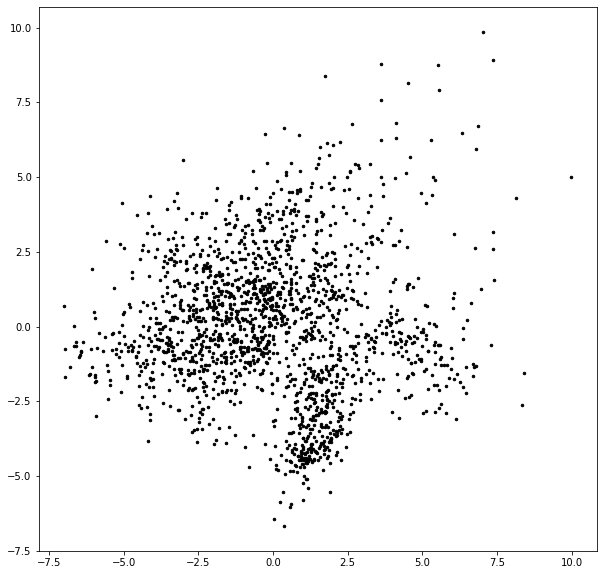

In [277]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

data = scale(X)
pca = PCA(n_components=2).fit(data)
points = PCA(n_components=2).fit_transform(data)
plt.figure(figsize=(10,10))
plt.plot(points[:, 0], points[:, 1], 'k.', markersize=5)

# 1. k-means

k-means步骤是随机选取K个对象作为初始的聚类中心，然后计算每个对象与各个种子聚类中心之间的距离，把每个对象分配给距离它最近的聚类中心。聚类中心以及分配给它们的对象就代表一个聚类。

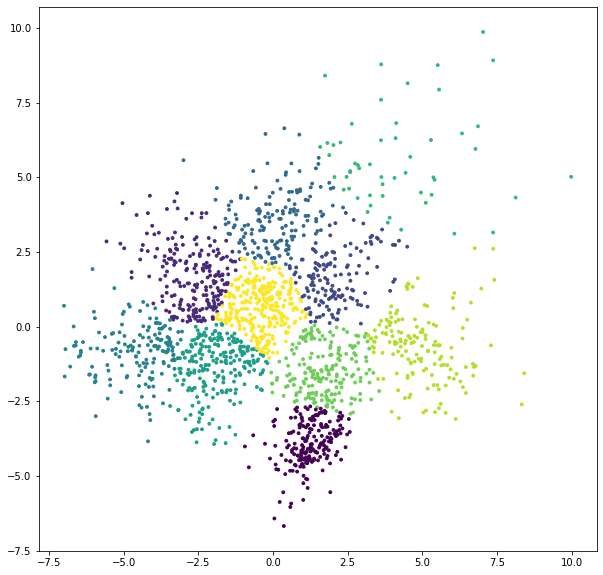

In [104]:
from sklearn.cluster import KMeans

estimator = KMeans(n_clusters=10)
estimator.fit(points)
labels = estimator.labels_

plt.figure(figsize=(10,10))
plt.scatter(points[:, 0], points[:, 1], c=labels, s=8)
plt.show()

# 2. MeanShift
MeanShift方法基本上是通过核加权实现质心漂移的方法。
estimate_bandwidth()用于生成mean-shift窗口的尺寸，其参数的意义为：从X中随机选取n个样本，计算每一对样本的距离，然后选取这些距离的p分位数作为返回值。

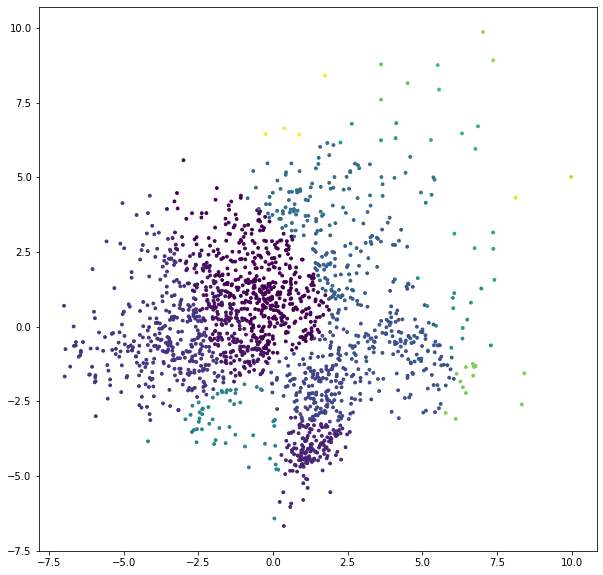

In [122]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(points, quantile = 0.05, n_samples = 200)
ms = MeanShift(bandwidth = bandwidth, bin_seeding = True)
ms.fit(points)
labels = ms.labels_

plt.figure(figsize=(10,10))
plt.scatter(points[:, 0], points[:, 1], c=labels, s=8)
plt.show()



# 3. affinity propagation
affinity propagation(AP)是一种基于数据点之间的“信息传递”的聚类算法。与k-means等其它聚类算法不同的是，AP不需要在聚类前确定或估计类的个数。

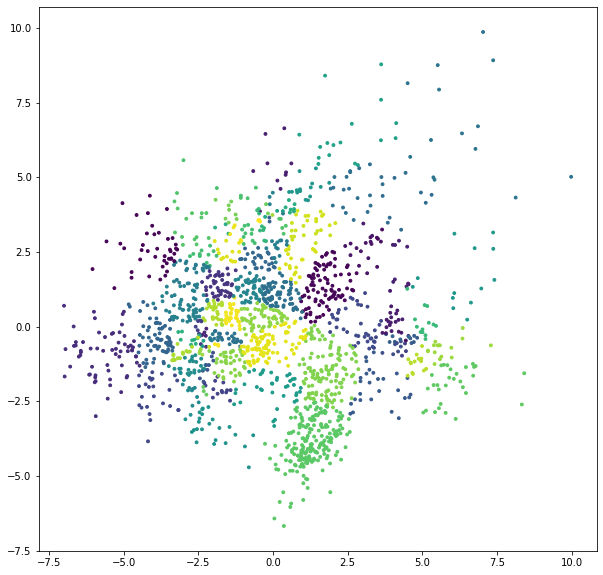

In [129]:
from sklearn.cluster import AffinityPropagation

af = AffinityPropagation(preference=-100)
af.fit(points)
labels = af.labels_

plt.figure(figsize=(10,10))
plt.scatter(points[:, 0], points[:, 1], c=labels, s=8)
plt.show()

# 4.SpectralClustering
谱聚类对数据分布的适应性更强，聚类效果也很优秀，同时聚类的计算量也小很多。它的主要思想是把所有的数据看做空间中的点，这些点之间可以用边连接起来。距离较远的两个点之间的边权重值较低，而距离较近的两个点之间的边权重值较高，通过对所有数据点组成的图进行切图，让切图后不同的子图间边权重和尽可能的低，而子图内的边权重和尽可能的高，从而达到聚类的目的。

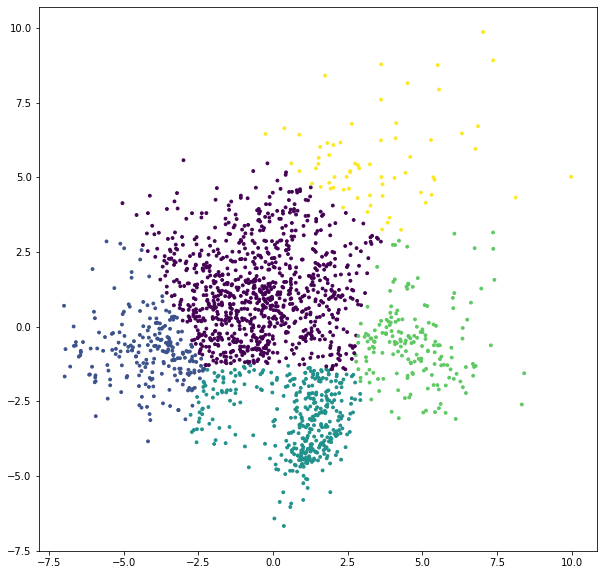

In [158]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=5, gamma=0.001)
sc.fit(points)
labels = sc.labels_

plt.figure(figsize=(10,10))
plt.scatter(points[:, 0], points[:, 1], c=labels, s=8)
plt.show()

# 5. Ward Hierarchical clustering
分层聚类通过依次合并或拆分簇来构造嵌套的树形簇结构。
linkage : {“ward”, “complete”, “average”, “single”}。就此数据集，“ward”效果最好。

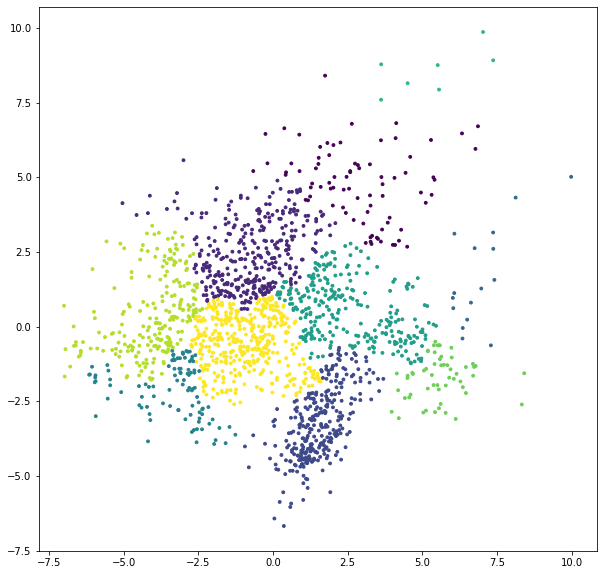

In [169]:
from sklearn.cluster import AgglomerativeClustering 
ac = AgglomerativeClustering(linkage = 'complete', n_clusters = 10)
ac.fit(points)
labels = ac.labels_

plt.figure(figsize=(10,10))
plt.scatter(points[:, 0], points[:, 1], c=labels, s=8)
plt.show()

# 6.DBSCAN
DBSCAN是一种基于密度的聚类算法，这类密度聚类算法一般假定类别可以通过样本分布的紧密程度决定。同一类别的样本，他们之间的紧密相连的，也就是说，在该类别任意样本周围不远处一定有同类别的样本存在。通过将紧密相连的样本划为一类，这样就得到了一个聚类类别。通过将所有各组紧密相连的样本划为各个不同的类别，则我们就得到了最终的所有聚类类别结果。

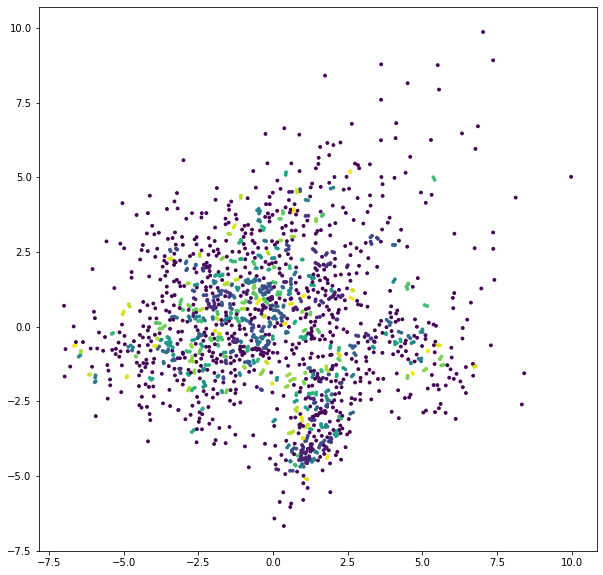

In [267]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.1, min_samples = 2)
dbscan.fit(points)
labels = dbscan.labels_

plt.figure(figsize=(10,10))
plt.scatter(points[:, 0], points[:, 1], c=labels, s=8)
plt.show()

# 7.OPTICS
OPTICS目标是将空间中的数据按照密度分布进行聚类，其思想和DBSCAN非常类似，但是和DBSCAN不同的是，OPTICS算法可以获得不同密度的聚类，直接说就是经过OPTICS算法的处理，理论上可以获得任意密度的聚类。因为OPTICS算法输出的是样本的一个有序队列，从这个队列里面可以获得任意密度的聚类。


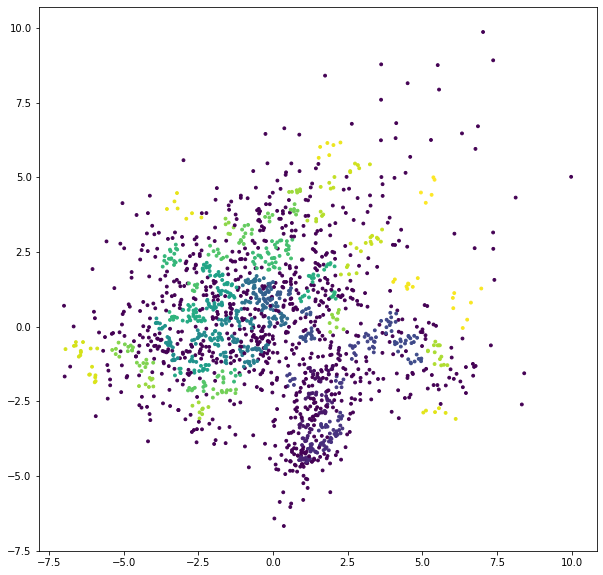

In [270]:
from sklearn.cluster import OPTICS
optics = OPTICS()
optics.fit(points)
labels = optics.labels_

plt.figure(figsize=(10,10))
plt.scatter(points[:, 0], points[:, 1], c=labels, s=8)
plt.show()

# 8.Gaussian mixtures 

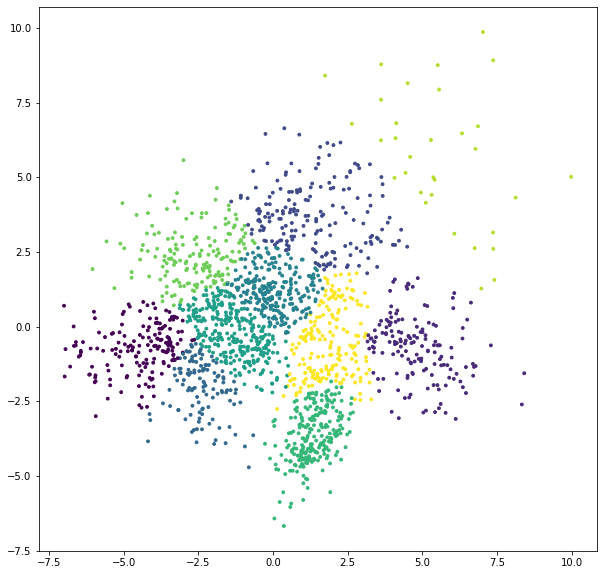

In [272]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=10)
gm.fit(points)
labels = gm.predict(points)

plt.figure(figsize=(10,10))
plt.scatter(points[:, 0], points[:, 1], c=labels, s=8)
plt.show()

# 9.Birch

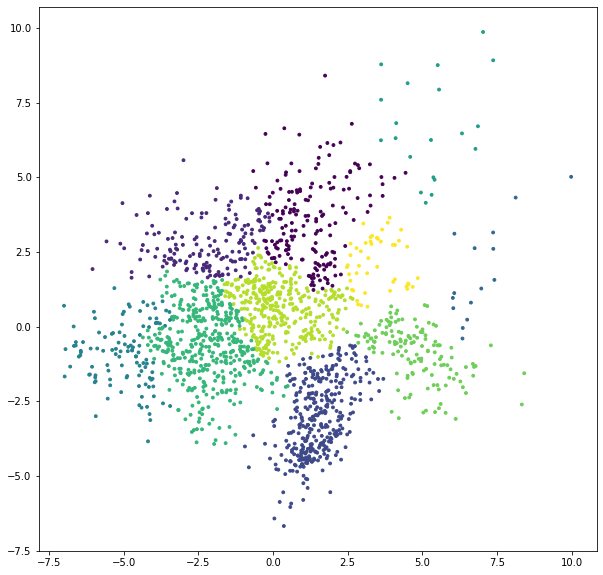

In [274]:
from sklearn.cluster import Birch
birch = Birch(n_clusters = 10)
birch.fit(points)
labels = birch.labels_

plt.figure(figsize=(10,10))
plt.scatter(points[:, 0], points[:, 1], c=labels, s=8)
plt.show()